## Roberto Di Via 4486648

# Final Project: Random Forest Classifier

In this project i'll focus on the machine learning algorithm: Random Forest Classifier.

The project is divided in 3 parts:
- **Data generation** 
- **Construction and Training of the Model**
- **Evalutation of the Model on the Synthetic Data**

### Libraries

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn import tree

## Description of the algorithm

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

While some trees may be wrong, many other trees will be right, so as a group the trees are able to move in the correct direction.

<img src="images/Random_forest_diagram2.png"  width=700 height=300>

## Benefits and Challenges

### Key Benefits
- **Reduced risk of overfitting:** 
Decision trees run the risk of overfitting as they tend to tightly fit all the samples within training data. However, when there’s a robust number of decision trees in a random forest, the classifier won’t overfit the model since the averaging of uncorrelated trees lowers the overall variance and prediction error.

- **Provides flexibility:** 
Since random forest can handle both regression and classification tasks with a high degree of accuracy, it is a popular method among data scientists. Feature bagging also makes the random forest classifier an effective tool for estimating missing values as it maintains accuracy when a portion of the data is missing.

- **Easy to determine feature importance:** 
Random forest makes it easy to evaluate variable importance, or contribution, to the model. There are a few ways to evaluate feature importance. Gini importance and mean decrease in impurity (MDI) are usually used to measure how much the model’s accuracy decreases when a given variable is excluded. However, permutation importance, also known as mean decrease accuracy (MDA), is another importance measure. MDA identifies the average decrease in accuracy by randomly permutating the feature values in oob samples.

### Key Challenges
- **Time-consuming process:** 
Since random forest algorithms can handle large data sets, they can be provide more accurate predictions, but can be slow to process data as they are computing data for each individual decision tree.

- **Requires more resources:** 
Since random forests process larger data sets, they’ll require more resources to store that data.

- **More complex:** 
The prediction of a single decision tree is easier to interpret when compared to a forest of them.

# Data Generation
In order to generate my dataset i used the `make_classification` function from [sklearn datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)

Useful parameter to know:

- **n_samples** refers to the number of samples.
- **n_features** refers to the number of columns/features of dataset. These comprise n_informative and n_redundant.
- **n_informative** refers to the number of features that will be useful in helping to classify your test dataset. In other words, if you perform PCA or another dimensionality reduction algorithm, you should be able to explain nearly 100 % of the variance in the problem with just n_informative features.
- **n_redundant** refers to the number of redundant features. These features are generated as random linear combinations of the informative features.
- **flip_y** refers to the fraction of samples whose class is assigned randomly. Larger values introduce noise in the labels and make the classification task harder. Default is 0.1
- **classe_sep** refers to the factor multiplying the hypercube size. Larger values spread out the clusters/classes and make the classification task easier.

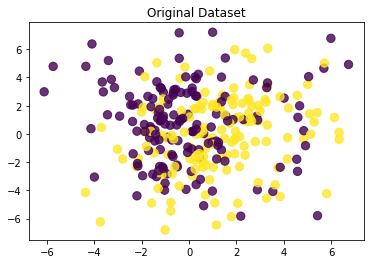

In [2]:
# Define dataset
X, y = make_classification(n_samples=300, n_features=20, n_informative=15, n_redundant=5, random_state=3, flip_y=0.1)

plt.figure()
plt.title("Original Dataset")
plt.scatter(X[:,0], X[:,1], s=70, c=y, alpha=0.8)

### Validation Set
The training error does not provide good estimates of the test error. 

A simple way, which is much better than the training error, to estimate the test error is to use a **hold-out set**: a small part of the training set which is held-out from training.

In this case i use the `train_test_split` function to split the starting dataset in 30% test set and 70% training set.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Construction and Training of the model 
To build and train the model i used the `RandomForestClassifier` from the [sklearn module](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

I defined the `print_score` function in order to get a detailed report of the model.

In [4]:
def print_score(model, X_train, y_train, X_test, y_test, train=False):

    if train:
        pred = model.predict(X_train) # Prediction
        
        model_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("\033[94m Train Result:\n================================================ \033[0m")
        print(f"\033[1m Accuracy Score: \033[0m {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        #print(f"\033[1m CLASSIFICATION REPORT:\033[0m \n{clf_report}")        
        #print("_______________________________________________")
        print(f"\033[1m Confusion Matrix:\033[0m \n {confusion_matrix(y_train, pred)}\n\n")
        
    elif train==False:
        pred = model.predict(X_test) # Prediction
        
        model_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("\033[94m Test Result:\n================================================ \033[0m")        
        print(f"\033[1m Accuracy Score: \033[0m {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        #print(f"\033[1m CLASSIFICATION REPORT:\033[0m \n{clf_report}")
        #print("_______________________________________________")
        print(f"\033[1m Confusion Matrix:\033[0m \n {confusion_matrix(y_test, pred)}\n\n")
        
    return pred

In [5]:
# define the model
model = RandomForestClassifier() 

# fit the model on the whole dataset
model.fit(X_train, y_train)

# make a single prediction
y_train_pred = print_score(model, X_train, y_train, X_test, y_test, train=True)
y_test_pred = print_score(model, X_train, y_train, X_test, y_test, train=False)

print("\033[1m Labels of the Test set: \033[0m\n", y_test)
print("\n\033[1m Predicted Labels of Test set: \033[0m\n", y_test_pred)

 Train Result:
 Accuracy Score:  100.00%
_______________________________________________
 Confusion Matrix: 
 [[111   0]
 [  0  99]]


 Test Result:
 Accuracy Score:  85.56%
_______________________________________________
 Confusion Matrix: 
 [[37  4]
 [ 9 40]]


 Labels of the Test set: 
 [1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1
 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1
 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1]

 Predicted Labels of Test set: 
 [1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1
 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1
 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1]


### Plot of the first 5 trees of the random forest
In this part i plot the first 5 trees of the random forest, as we can see they are all uncorrelated, that's a good thing.

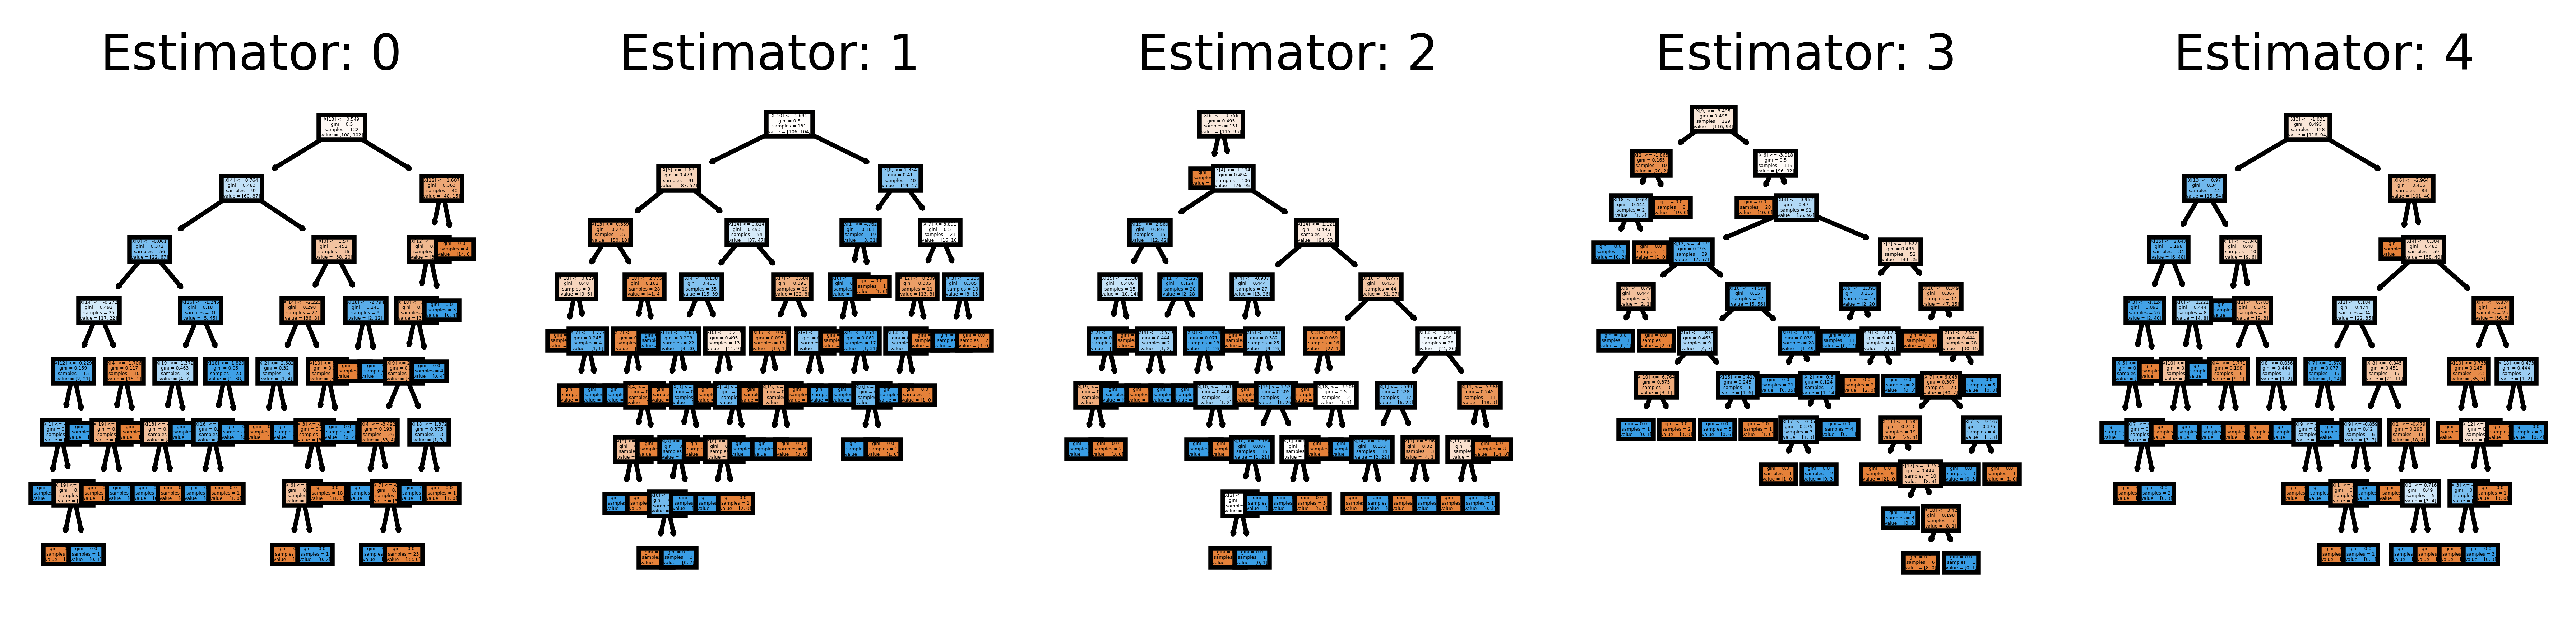

In [6]:
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)

for index in range(0, 5):
    tree.plot_tree(model.estimators_[index],
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('images/rfc_5trees.png')

# Experimental Assessment

#### Evaluation of the prediction

The `calcError` function compute the error in the predictions of a certain model.

In [7]:
def calcError(Ypred, Ytrue):
    return (np.count_nonzero(Ypred != Ytrue)) / len(Ytrue)

## Comparison between the Decision Tree and the Random Forest
In this part i tried different noises during the generation of the datasets in order to compare the predictions using the Random Forest Classifier and the Decision Tree Classifier. 

In [19]:
noise_array = [0.1, 0.2, 0.3, 0.4, 0.5]
tree_error = []
forest_error = []

for i in noise_array:
    
    # data generation with noise
    X, y = make_classification(n_samples=300, n_features=20, n_informative=15, n_redundant=5, random_state=3, flip_y=i)
    #X, y = mixGauss([[0,0],[1,1]], [i, i], 300)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    # dtc = decision tree classifier 
    dtc = tree.DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    dtc_pred = dtc.predict(X_test)
    
    # rfc = random forest classifier 
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    
    # error
    dtc_err = calcError(dtc_pred, y_test)
    rfc_err = calcError(rfc_pred, y_test)
    
    tree_error.append(dtc_err)
    forest_error.append(rfc_err)
    

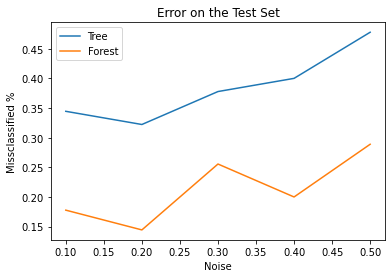

In [20]:
# Plot the validation and test errors
fig, ax = plt.subplots()
ax.set_title("Error on the Test Set")
ax.plot(noise_array, tree_error, label="Tree")
ax.plot(noise_array, forest_error, label="Forest")
ax.set_xlabel("Noise")
ax.set_ylabel("Missclassified %")
ax.legend();

From the resulting chart we can observe that the Random Forest Classifier perform better than the Decision Tree Classifier, even when the noise increase.

### K-Fold Cross Validation
In this part i define the K-Fold Cross validation for the Random Forest model, in order to find the best parameters that gives us the lowest error.

In [10]:
def KFoldCV(Xtr, Ytr, num_folds, k_list, name):
    """Run K-Fold CV for the Random Forest model
    
    Parameters:
    -----------
     - Xtr : np.array
         the full training set data
     - Ytr : np.array
         the full training set labels
     - num_folds : int
         the number of folds
     - k_list : List[int]
         the values of k to try.
         
    Returns:
    --------
     - best_k : int
         The value of k (in k_list) which obtains the best average validation error
     - best_k_idx : int
         The index of the best_k element in k_list
     - tr_err_mean : np.array
         A 1D array of the same length as k_list, with the average training error for each tested k.
     - tr_err_std : np.array
         A 1D array of the same length as k_list, with the standard deviation 
         of the training error for each tested k.
     - val_err_mean : np.array
         A 1D array of the same length as k_list, with the average validation error for each tested k.
     - val_err_std : np.array
         A 1D array of the same length as k_list, with the standard deviation
         of the validation error for each tested k.
    """
    rnd_state = np.random.RandomState()
    # Ensures that k_list is a numpy array
    k_list = np.array(k_list)
    num_k = len(k_list)

    n_tot = Xtr.shape[0]
    n_val = n_tot // num_folds

    # We want to compute 1 error for each `k` and each fold
    tr_errors = np.zeros((num_k, num_folds))
    val_errors = np.zeros((num_k, num_folds))

    # `split_idx`: a list of arrays, each containing the validation indices for 1 fold
    rand_idx = rnd_state.choice(n_tot, size=n_tot, replace=False)
    split_idx = np.array_split(rand_idx, num_folds)
    
    for fold_idx in range(num_folds):
        # Set the indices in boolean mask for all validation samples to `True`
        val_mask = np.zeros(n_tot, dtype=bool)
        val_mask[split_idx[fold_idx]] = True
        # Split training set in training part and validation part
        # Hint: you can use boolean mask as index vector to split Xtr and Ytr

        x_train = Xtr[~val_mask]
        y_train = Ytr[~val_mask]
        x_val = Xtr[val_mask]
        y_val = Ytr[val_mask]
        
        for k_idx, current_k in enumerate(k_list):
            
            if name=='estimators':
                rfc = RandomForestClassifier(n_estimators=current_k)
            elif name=='features':
                rfc = RandomForestClassifier(max_features=current_k)
            elif name=='samples':
                rfc = RandomForestClassifier(max_samples=current_k)
            elif name=='depth':
                rfc = RandomForestClassifier(max_depth=current_k)
            else:
                rfc = RandomForestClassifier()
                
            rfc.fit(x_train, y_train)
            rfc_pred_train = rfc.predict(x_train)
            rfc_pred_val = rfc.predict(x_val)
            
            # Compute the training error of the kNN classifier for the given value of k
            tr_errors[k_idx, fold_idx] =  calcError(rfc_pred_train, y_train)
            # Compute the validation error of the kNN classifier for the given value of k
            val_errors[k_idx, fold_idx] = calcError(rfc_pred_val, y_val)
            
            
    # Calculate error statistics along the repetitions:    
    # 1) mean training error, training error standard deviation
    tr_mean = np.mean(tr_errors, axis=1)
    tr_var = np.var(tr_errors, axis=1)
    
    # 2) mean validation error, validation error standard deviation
    val_mean = np.mean(val_errors, axis=1)
    val_var = np.var(val_errors, axis=1)
    
    # 3) best k (k which minimize mean validation error) and index of best k in k_list
    best_k_idx = np.argmin(val_mean)
    best_k = k_list[best_k_idx]
    
    return best_k, best_k_idx, tr_mean, tr_var, val_mean, val_var

## Random Forest Hyperparameters
In this section, i will take a closer look at some of the hyperparameters tuning for the random forest ensemble and their effect on model performance. 

First, i use the `make_classification` function to create a synthetic binary classification problem.
Then, through the `train_test_split` function, i split the dataset into a 70% training set and 30% validation set.

In [11]:
X, y = make_classification(n_samples=300, n_features=20, n_informative=15, n_redundant=5, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

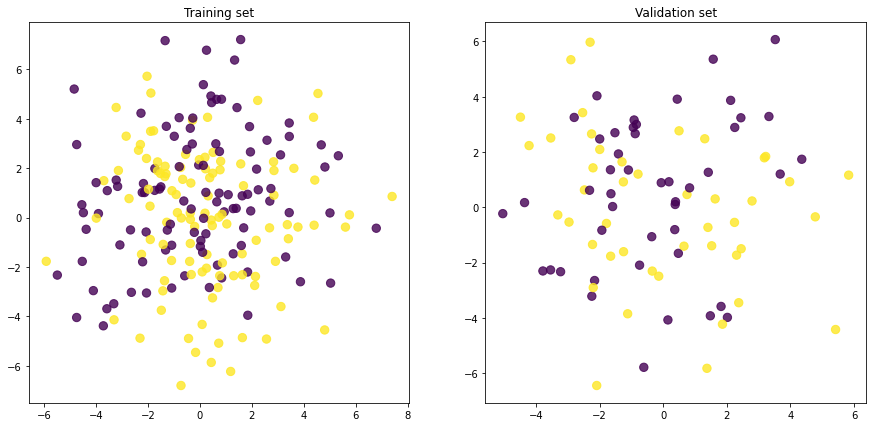

In [12]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.title("Training set")
plt.scatter(X_train[:,0], X_train[:,1], s=70, c=y_train, alpha=0.8)

plt.subplot(1,2,2)
plt.title("Validation set")
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, alpha=0.8)

### 1. The number of trees

The number of trees is a key hyperparameter to configure for the random forest.

Typically, the number of trees is increased until the model performance stabilizes. Intuition might suggest that more trees will lead to overfitting, although this is not the case. Both bagging and random forest algorithms appear to be somewhat immune to overfitting the training dataset given the stochastic nature of the learning algorithm.

The number of trees can be set via the “n_estimators” argument and defaults to 100.

The example below explores the effect of the number of trees with values between 10 to 1,000.

In [13]:
estimators_array = [10, 50, 100, 500, 1000]
forest_error = []

for i in estimators_array:
    
    # Building model
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    
    # Compute the error
    rfc_err = calcError(rfc_pred, y_test)
    
    forest_error.append(rfc_err)

Text(0, 0.5, 'Missclassified %')

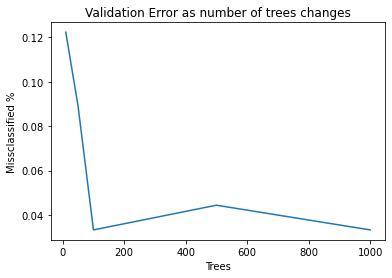

In [14]:
# Plot the validation errors
fig, ax = plt.subplots()
ax.set_title("Validation Error as number of trees changes")
ax.plot(estimators_array, forest_error)
ax.set_xlabel("Trees")
ax.set_ylabel("Missclassified %")

####  Using Cross Validation

The best estimators chosen with 10 folds is 50 with error 8.00 +- 0.18%


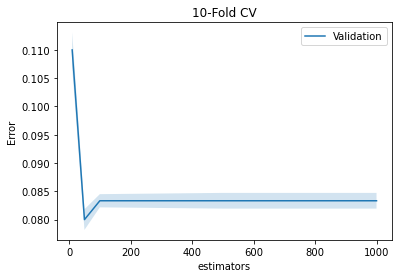

In [15]:
estimators_array = [10, 50, 100, 500, 1000]
num_folds = 10
name='estimators'

best_k, best_k_idx, tr_err_mean, tr_err_std, val_err_mean, val_err_std = KFoldCV(X, y, num_folds, estimators_array, name)

print(f"The best {name} chosen with {num_folds} folds is {best_k} with error "
  f"{np.min(val_err_mean) * 100:.2f} +- {val_err_std[np.argmin(val_err_mean)] * 100:.2f}%")
    
fig, ax = plt.subplots()
ax.plot(estimators_array, val_err_mean, label="Validation")
ax.fill_between(estimators_array, val_err_mean - val_err_std, val_err_mean + val_err_std, alpha=0.2)

ax.set_title(f"{num_folds}-Fold CV")
ax.set_ylabel("Error")
ax.set_xlabel(f"{name}")
ax.legend();

In this case, we can see that performance is better after about 50/100 trees. Mean accuracy scores fluctuate across 100, 500, and 1,000 trees and this may be statistical noise

### 2. The number of features per node
The number of features that is randomly sampled for each split point is perhaps the most important feature to configure for random forest.

It is set via the "max_features" argument and defaults to the square root of the number of input features. In this case, for our test dataset, this would be sqrt(20) or about four features.

The example below explores the effect of the number of features randomly selected at each split point on model accuracy. 

I will try values from 1 to 14 and would expect a small value, around 4, to perform well.

In [16]:
number_features = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
forest_error = []

for i in number_features:
   
    # Building model
    rfc = RandomForestClassifier(max_features=i)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    
    # Evaluation
    rfc_err = calcError(rfc_pred, y_test)
    
    forest_error.append(rfc_err)

Text(0, 0.5, 'Missclassified %')

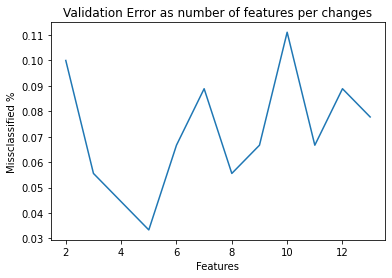

In [17]:
# Plot the validation errors
fig, ax = plt.subplots()
ax.set_title("Validation Error as number of features per changes")
ax.plot(number_features, forest_error)
ax.set_xlabel("Features")
ax.set_ylabel("Missclassified %")

#### Using Cross Validation

The best features chosen with 10 folds is 5 with error 8.00 +- 0.12%


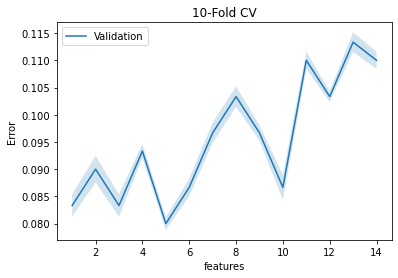

In [18]:
number_features = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
num_folds = 10
name='features'

best_k, best_k_idx, tr_err_mean, tr_err_std, val_err_mean, val_err_std = KFoldCV(X, y, num_folds, number_features, name)

print(f"The best {name} chosen with {num_folds} folds is {best_k} with error "
  f"{np.min(val_err_mean) * 100:.2f} +- {val_err_std[np.argmin(val_err_mean)] * 100:.2f}%")

    
fig, ax = plt.subplots()
ax.plot(number_features, val_err_mean, label="Validation")
ax.fill_between(number_features, val_err_mean - val_err_std, val_err_mean + val_err_std, alpha=0.2)

ax.set_title(f"{num_folds}-Fold CV")
ax.set_ylabel("Error")
ax.set_xlabel(f"{name}")
ax.legend();

In this case, the results suggest that a value between 3 and 5 would be appropriate. Increasing the number of features per node increase also the missclassification.

### 3. The number of Samples
Each decision tree in the ensemble is fit on a bootstrap sample drawn from the training dataset.

This can be turned off by setting the “bootstrap” argument to False. In that case, the whole training dataset will be used to train each decision tree. This is not recommended.

The “max_samples” argument can be set to a float between 0 and 1 to control the percentage of the size of the training dataset to make the bootstrap sample used to train each decision tree.

For example, if the training dataset has 100 rows, the max_samples argument could be set to 0.5 and each decision tree will be fit on a bootstrap sample with (100 * 0.5) or 50 rows of data.

**A smaller sample size will make trees more different, and a larger sample size will make the trees more similar**. 
Setting max_samples to “None” will make the sample size the same size as the training dataset and this is the default.

The example below demonstrates the effect of different bootstrap sample sizes from 10 percent to 100 percent on the random forest algorithm.

In [24]:
#If None (default), then draw X.shape[0] samples.
#If int, then draw max_samples samples.
#If float, then draw max_samples * X.shape[0] samples. Thus, max_samples should be in the interval (0.0, 1.0].
sample_size = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]+[None]  #None is to use the 100%
forest_error = []

for i in sample_size:

    # Building Model
    rfc = RandomForestClassifier(max_samples = i)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    
    # Evaluation
    rfc_err = calcError(rfc_pred, y_test)
    
    forest_error.append(rfc_err)

Text(0, 0.5, 'Missclassified %')

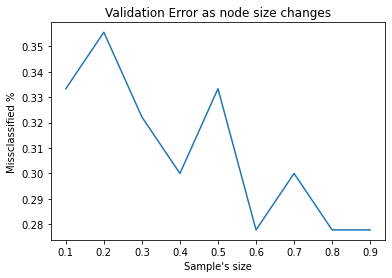

In [25]:
# Plot the validation and test errors
fig, ax = plt.subplots()
ax.set_title("Validation Error as node size changes")
ax.plot(sample_size, forest_error)
ax.set_xlabel("Sample's size")
ax.set_ylabel("Missclassified %")

#### Using Cross Validation

The best samples's size chosen with 5 folds is 0.9 with error 33.33 +- 0.67%


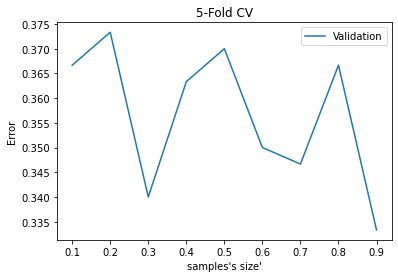

In [54]:
sample_size = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]+[None] # None is the 100% of the set
num_folds = 5
name='samples'

best_k, best_k_idx, tr_err_mean, tr_err_std, val_err_mean, val_err_std = KFoldCV(X, y, num_folds, sample_size, name)

print(f"The best {name}'s size chosen with {num_folds} folds is {best_k} with error "
  f"{np.min(val_err_mean) * 100:.2f} +- {val_err_std[np.argmin(val_err_mean)] * 100:.2f}%")

    
fig, ax = plt.subplots()
ax.plot(sample_size, val_err_mean, label="Validation")
#ax.fill_between(sample_size, val_err_mean - val_err_std, val_err_mean + val_err_std, alpha=0.2)

ax.set_title(f"{num_folds}-Fold CV")
ax.set_ylabel("Error")
ax.set_xlabel(f"{name}'s size")
ax.legend();

In this case, the results suggest that using a bootstrap sample size that is equal to the size of the training dataset achieves the best results on this dataset.

This is the default and it should probably be used in most cases.

### 4. The tree depth
A final interesting hyperparameter is the maximum depth of decision trees used in the ensemble.

By default, trees are constructed to an arbitrary depth and are not pruned. This is a sensible default, although we can also explore fitting trees with different fixed depths.

The maximum tree depth can be specified via the "max_depth" argument and is set to None (no maximum depth) by default.

The example below explores the effect of random forest maximum tree depth on model performance.

In [32]:
depths = [i for i in range(1,8)] + [None]
forest_error = []

for i in depths:

    # Building Model
    rfc = RandomForestClassifier(max_depth = i)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    
    # Evaluation
    rfc_err = calcError(rfc_pred, y_test)
    
    forest_error.append(rfc_err)
    

Text(0, 0.5, 'Missclassified %')

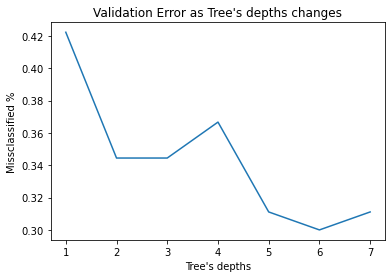

In [33]:
# Plot the validation and test errors
fig, ax = plt.subplots()
ax.set_title("Validation Error as Tree's depths changes")
ax.plot(depths, forest_error)
ax.set_xlabel("Tree's depths")
ax.set_ylabel("Missclassified %")

#### Using Cross Validation

The best depth chosen with 10 folds is 9 with error 31.00 +- 1.13%


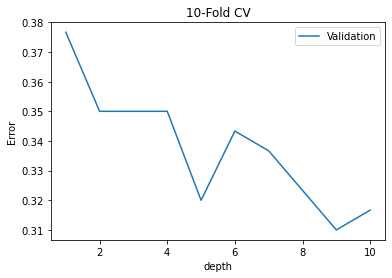

In [44]:
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]+[None] 
num_folds = 10
name='depth'

best_k, best_k_idx, tr_err_mean, tr_err_std, val_err_mean, val_err_std = KFoldCV(X, y, num_folds, depths, name)

print(f"The best {name} chosen with {num_folds} folds is {best_k} with error "
  f"{np.min(val_err_mean) * 100:.2f} +- {val_err_std[np.argmin(val_err_mean)] * 100:.2f}%")

    
fig, ax = plt.subplots()
ax.plot(depths, val_err_mean, label="Validation")
#ax.fill_between(depths, val_err_mean - val_err_std, val_err_mean + val_err_std, alpha=0.2)

ax.set_title(f"{num_folds}-Fold CV")
ax.set_ylabel("Error")
ax.set_xlabel(f"Tree's {name}")
ax.legend();

In this case, we can see that larger depth results in better model performance, with the default of no maximum depth we achieving the best performance on this dataset.